

m4h2 requires the following packages in the environment: numpy, pandas, mcerp, CoolProp

Additionally, the following packages should be placed in the modules folder:

    - AGA8Detail.py, molcules.py and initialise.py (available from https://github.com/Dseal95/AGA8_Detail)
    - uncertaintyCalculator.py (available from https://gitlab.norceresearch.no/uncertainpy/uncertaintycalculator)
    - fluid.py (available from TREND)

TREND should also be installed, and the path to the dll files set as shown below.


In [24]:
import os



from met4h2 import met4H2

from streamProcess import streamProcess
from metering import metering

from modules.uncertaintyCalculator import uncertaintyCalculator

meter = metering()
stream = streamProcess()
m4h2 = met4H2()
ucalc = uncertaintyCalculator()

m4h2.trend_path = os.path.join(
    os.getcwd(),'modules','TREND','TREND 5.0')
m4h2.trend_dll_path = os.path.join(
    m4h2.trend_path,'TREND_x64.dll') # running 64 bit Python
filepath = os.getcwd()
# filename = 'settings_example_20230616.xlsx'
filename = 'settings_USM_example_with_He_20230705.xlsx'
n_draws = 500    # With many draws code will take longer to run
                # Keeping it low for testing purposes.

In [25]:
# Reading the settings file is one of potentially several
# ways to create node, stream and meter objects.
m4h2.read_settings_file(
    ucalc, stream, meter, filename,
    filepath = filepath, meter_type = 'USM')

In [26]:
# Info from stream and meter objects
# are combined in a big data frame.
m4h2.collect_measurement_input(stream,meter)

In [27]:
# Based on the m4h2.all_measurement_input frame,
# one can get lhs monte carlo draws.
m4h2.draw_lhs_monte_carlo_samples(n_draws=n_draws)

In [28]:
# Decide whether to do nominal calculations with no uncertainties
# or not. If using method = 'pyforfluids' or 'TREND',
# default eqn of state is 'GERG2008',
# but this can be modified to 'AGA8' if using TREND.
# If method = 'AGA8Detail' AGA8 eqn of stat is used.
pyforfluids_properties = m4h2.compute_gas_properties(method='pyforfluids')

#TREND_properties = m4h2.compute_gas_properties(method='TREND',eqn_of_state='GERG2008',nominal=True)

2732.1704881191254


In [29]:
# Test normality of the computed gas parameters.
# With higher n_draws, this often gets better.
m4h2.test_normality(pyforfluids_properties,filepath)

<Figure size 640x480 with 0 Axes>

In [30]:
# The uncertainty calculator accepts a dictionary
# as input. Create that dictionary with initialize
# uncertainty calculator. comutation method could
# also be set to 'analytical'.
m4h2.initialize_uncertainty_calculator(
    ucalc,
    pyforfluids_properties,
    computation_method='lhs_montecarlo',
    n_mc_draws=1000)

# The input file could have limits set, such
# that the probability distributions of the
# input variable is truncated.

Note that truncated distributions will only be used with rectangular and Gaussian distributions and with computational method set to 'lhs_montecarlo'.


In [31]:
ucalc.perform_uncertainty_analysis()

# Noise can cause the correlation matrix
# to have negative eigenvalues.

C:\Users\kjfo\AppData\Local\Temp\ipykernel_23316\2638776925.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot1.show()


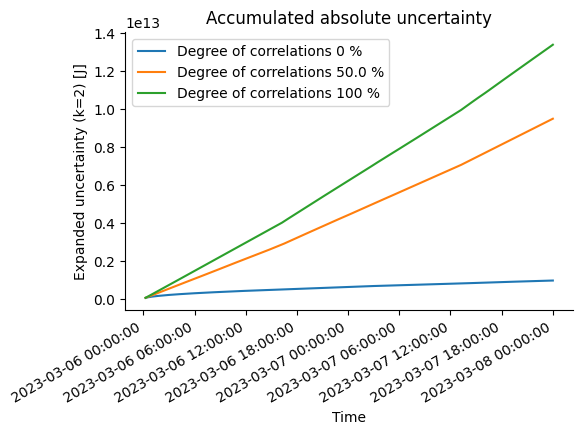

In [32]:
# A few ways to plot the output.
# Make sure to use a suitable file path.
# r_vector: one graph will be plotted for each entry
#           in r_vector, with r = entry
# plot_type:options are 'absolute' and 'relative'

plot1 = ucalc.plot_with_temporal_correlations(
    r_vector = [0,0.5,1],
    plot_type = 'absolute',
    filepath=filepath+'\\figures\\uncertainty_in_time')
plot1.show()

C:\Users\kjfo\AppData\Local\Temp\ipykernel_23316\1613986399.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot2.show()


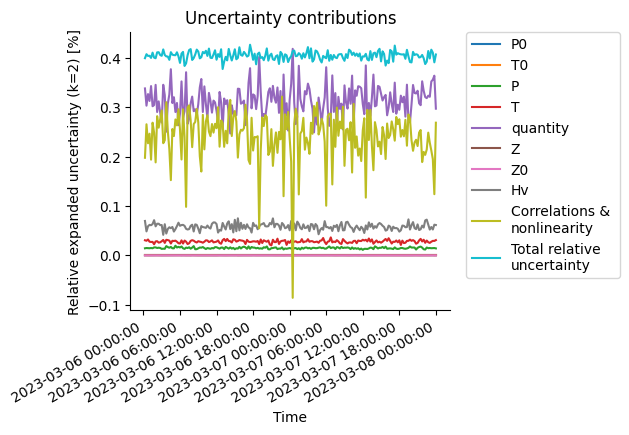

In [33]:
plot2 = ucalc.plot_without_temporal_correlations(filepath+'\\figures\\uncertainty_in_time')
plot2.show()

C:\Users\kjfo\AppData\Local\Temp\ipykernel_23316\696294318.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot3.show()


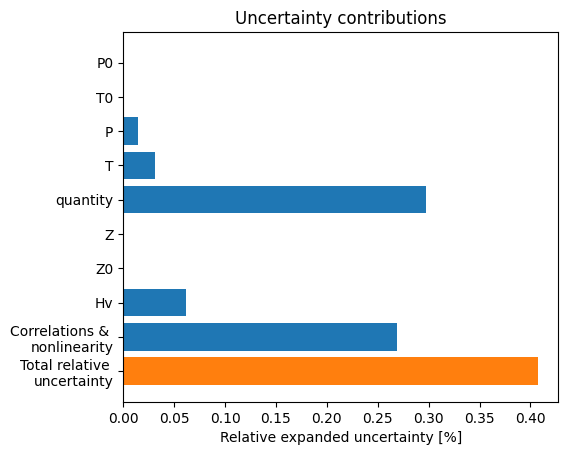

In [34]:
plot3 = ucalc.plot_simple_bar_budget(filepath+'\\figures\\uncertainty_budget')
plot3.show()

In [35]:
# In case one wishes to view the results in excel.
ucalc.output_to_excel(os.getcwd(),'tester.xlsx')

Writing results to c:\Users\kjfo\OneDrive - NORCE\data\GitHub\Met4H2/output_tester_lhs_montecarlo.xlsx


In [36]:
# Results can also be obtained from the ucalc object.
ucalc.analysis_results['output_values']

,DateTime,E,units
0,2023-03-06 00:15:00,1.517578e+13,J
1,2023-03-06 00:30:00,1.518059e+13,J
2,2023-03-06 00:45:00,1.520413e+13,J
3,2023-03-06 01:00:00,1.519162e+13,J
4,2023-03-06 01:15:00,1.512217e+13,J
...,...,...,...
187,2023-03-07 23:00:00,1.982054e+13,J
188,2023-03-07 23:15:00,1.981604e+13,J
189,2023-03-07 23:30:00,1.978278e+13,J
190,2023-03-07 23:45:00,1.978322e+13,J


In [37]:
m4h2.main_m4h2_output['Z'].head()

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_490,Z_491,Z_492,Z_493,Z_494,Z_495,Z_496,Z_497,Z_498,Z_499
0,1.269006,1.269896,1.268777,1.268071,1.268940,1.269082,1.269724,1.269376,1.269030,1.270039,...,1.268420,1.268832,1.269542,1.269705,1.269120,1.268902,1.269601,1.269742,1.269165,1.268671
1,1.267941,1.269066,1.268852,1.269942,1.269346,1.269888,1.268652,1.269613,1.269883,1.270698,...,1.270163,1.269130,1.268748,1.269063,1.268900,1.269287,1.269073,1.270181,1.269704,1.269844
2,1.270283,1.269670,1.270279,1.270001,1.269864,1.270155,1.270518,1.270853,1.268750,1.270028,...,1.268973,1.268842,1.270336,1.270774,1.270547,1.269408,1.270056,1.268664,1.269622,1.269677
3,1.269683,1.269181,1.269585,1.270671,1.269956,1.270260,1.269980,1.269450,1.270056,1.269214,...,1.270154,1.269493,1.269166,1.268399,1.270040,1.270194,1.270015,1.269039,1.269979,1.268937
4,1.268421,1.266942,1.266483,1.268198,1.267786,1.266784,1.268758,1.268106,1.268578,1.266782,...,1.268088,1.267620,1.267942,1.266505,1.267205,1.267739,1.268020,1.266451,1.267630,1.268454


In [38]:
m4h2.main_m4h2_output['Z0'].head()

,Z0_0,Z0_1,Z0_2,Z0_3,Z0_4,Z0_5,Z0_6,Z0_7,Z0_8,Z0_9,...,Z0_490,Z0_491,Z0_492,Z0_493,Z0_494,Z0_495,Z0_496,Z0_497,Z0_498,Z0_499
0,0.997973,0.997974,0.997975,0.997973,0.997975,0.997975,0.997976,0.997973,0.997975,0.997974,...,0.997976,0.997973,0.997975,0.997975,0.997974,0.997973,0.997974,0.997976,0.997973,0.997972
1,0.997974,0.997973,0.997973,0.997974,0.997975,0.997973,0.997975,0.997975,0.997973,0.997972,...,0.997976,0.997976,0.997973,0.997972,0.997972,0.997974,0.997974,0.997974,0.997975,0.997974
2,0.997976,0.997973,0.997973,0.997973,0.997972,0.997974,0.997972,0.997974,0.997972,0.997972,...,0.997971,0.997974,0.997973,0.997974,0.997972,0.997972,0.997974,0.997975,0.997975,0.997973
3,0.997971,0.997971,0.997972,0.997969,0.99797,0.99797,0.99797,0.99797,0.99797,0.997974,...,0.99797,0.997968,0.997972,0.997971,0.997973,0.99797,0.99797,0.99797,0.997972,0.99797
4,0.99797,0.997973,0.997972,0.997974,0.997971,0.997973,0.997973,0.997972,0.99797,0.997972,...,0.997972,0.997975,0.997972,0.997975,0.997971,0.997971,0.997971,0.997971,0.997973,0.997972


In [39]:
m4h2.main_m4h2_output['MM'].head()

,MM_0,MM_1,MM_2,MM_3,MM_4,MM_5,MM_6,MM_7,MM_8,MM_9,...,MM_490,MM_491,MM_492,MM_493,MM_494,MM_495,MM_496,MM_497,MM_498,MM_499
0,0.018487,0.018482,0.018486,0.018496,0.018481,0.018483,0.01848,0.018492,0.018493,0.01849,...,0.01848,0.018484,0.018482,0.018482,0.018493,0.018492,0.018489,0.018484,0.018489,0.0185
1,0.018485,0.018487,0.018489,0.018487,0.018489,0.01849,0.018478,0.018498,0.018491,0.018498,...,0.01848,0.018485,0.01849,0.018499,0.018497,0.01849,0.01849,0.018489,0.018491,0.018486
2,0.018485,0.018502,0.01849,0.018492,0.018503,0.018491,0.018498,0.018493,0.018501,0.018499,...,0.018492,0.018501,0.018488,0.018494,0.018501,0.018508,0.018501,0.018491,0.018485,0.018489
3,0.018496,0.018496,0.018494,0.018508,0.018502,0.018505,0.018507,0.018496,0.0185,0.018491,...,0.018505,0.018506,0.018496,0.018506,0.018492,0.018502,0.018502,0.018507,0.018495,0.018502
4,0.018495,0.01849,0.018491,0.01849,0.0185,0.018492,0.018492,0.018487,0.018503,0.018494,...,0.018499,0.018484,0.018492,0.018485,0.0185,0.018495,0.018498,0.018503,0.018495,0.018498


In [40]:
m4h2.main_m4h2_output['DM'].head()

,DM_0,DM_1,DM_2,DM_3,DM_4,DM_5,DM_6,DM_7,DM_8,DM_9,...,DM_490,DM_491,DM_492,DM_493,DM_494,DM_495,DM_496,DM_497,DM_498,DM_499
0,18095.513808,18102.457973,18095.350327,18094.468131,18101.802567,18104.81985,18093.444086,18096.48539,18098.800234,18100.235516,...,18103.586262,18094.184692,18102.12448,18100.435906,18097.924503,18102.767118,18102.336157,18102.721675,18095.880147,18098.209596
1,18101.422547,18101.284793,18098.164543,18100.326164,18105.749305,18105.963983,18098.884178,18100.134685,18101.539443,18105.112602,...,18097.758021,18097.51797,18099.203698,18097.72173,18102.005473,18097.134735,18099.736754,18099.112112,18101.522541,18101.627022
2,18101.826851,18098.914081,18101.406237,18102.599775,18100.583171,18112.042727,18101.530055,18105.509987,18098.811008,18100.02689,...,18103.831702,18104.575068,18103.155139,18103.644411,18105.115267,18100.489511,18098.690437,18103.448604,18105.967794,18106.898658
3,18106.303402,18106.88934,18103.435636,18107.660816,18104.250316,18105.155979,18104.218657,18103.702796,18103.392572,18102.712616,...,18101.777411,18101.640032,18103.492719,18096.135514,18103.745293,18099.536035,18107.053118,18101.83741,18104.813818,18097.443688
4,18097.471077,18089.741108,18092.538698,18093.683964,18090.18419,18090.915329,18091.919514,18095.677074,18093.17545,18087.665277,...,18095.244607,18093.507363,18099.530963,18091.317553,18088.011601,18092.777735,18093.648311,18090.999693,18090.92788,18099.603946


In [41]:
m4h2.main_m4h2_output['DM0'].head()

,DM0_0,DM0_1,DM0_2,DM0_3,DM0_4,DM0_5,DM0_6,DM0_7,DM0_8,DM0_9,...,DM0_490,DM0_491,DM0_492,DM0_493,DM0_494,DM0_495,DM0_496,DM0_497,DM0_498,DM0_499
0,42.378386,42.37834,42.378317,42.378383,42.378333,42.378294,42.378287,42.378383,42.378316,42.378361,...,42.378279,42.378399,42.378314,42.378307,42.378358,42.378376,42.378362,42.378282,42.37839,42.378451
1,42.378366,42.378378,42.37839,42.378333,42.37833,42.378402,42.378328,42.378312,42.378381,42.378424,...,42.378258,42.378273,42.378394,42.378429,42.378452,42.378341,42.378367,42.378369,42.378327,42.37835
2,42.378282,42.378404,42.378379,42.37838,42.378448,42.378353,42.378443,42.378373,42.378439,42.378431,...,42.378463,42.37836,42.378404,42.378372,42.37844,42.378457,42.378363,42.378306,42.378318,42.378388
3,42.378494,42.37848,42.378434,42.378554,42.378511,42.378503,42.378505,42.37852,42.378519,42.378355,...,42.378505,42.378612,42.378453,42.378499,42.37838,42.378508,42.378519,42.378544,42.378441,42.378543
4,42.37851,42.378405,42.37842,42.378342,42.378472,42.378382,42.378397,42.37844,42.378505,42.378451,...,42.378459,42.378296,42.378444,42.378331,42.378496,42.378492,42.378476,42.37848,42.378416,42.378435


In [42]:
m4h2.main_m4h2_output['D'].head()

,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,...,D_490,D_491,D_492,D_493,D_494,D_495,D_496,D_497,D_498,D_499
0,334.539194,334.563623,334.506598,334.682956,334.544514,334.629528,334.37433,334.640022,334.697088,334.664363,...,334.558085,334.461451,334.563101,334.53779,334.679738,334.755517,334.690644,334.613614,334.570104,334.813131
1,334.60945,334.644313,334.620795,334.629464,334.753624,334.783431,334.422412,334.80784,334.720008,334.901371,...,334.439233,334.530007,334.647963,334.78182,334.838237,334.624448,334.669053,334.642621,334.723693,334.619314
2,334.611804,334.872502,334.688117,334.761451,334.922695,334.905033,334.841446,334.833655,334.847402,334.840091,...,334.784393,334.952362,334.683538,334.80998,334.957897,335.008452,334.84341,334.755099,334.68711,334.783543
3,334.892878,334.911405,334.799198,335.129456,334.972668,335.040553,335.062241,334.845898,334.911032,334.732787,...,334.975118,334.988038,334.845357,334.884931,334.766704,334.879273,335.017139,335.012785,334.841727,334.831763
4,334.710135,334.487487,334.550644,334.553944,334.661051,334.538363,334.547323,334.53415,334.783619,334.512626,...,334.748461,334.448234,334.698801,334.414424,334.629696,334.620559,334.695704,334.740455,334.593441,334.806885


In [43]:
m4h2.main_m4h2_output['D0'].head()

,D0_0,D0_1,D0_2,D0_3,D0_4,D0_5,D0_6,D0_7,D0_8,D0_9,...,D0_490,D0_491,D0_492,D0_493,D0_494,D0_495,D0_496,D0_497,D0_498,D0_499
0,0.783467,0.783222,0.783396,0.783849,0.783206,0.783274,0.783168,0.783661,0.783693,0.783555,...,0.78316,0.783342,0.783235,0.783249,0.783691,0.783659,0.783525,0.783327,0.783523,0.783993
1,0.783375,0.783463,0.783543,0.783469,0.783525,0.783586,0.783046,0.783894,0.783629,0.7839,...,0.783133,0.783356,0.783562,0.78394,0.783887,0.783595,0.783588,0.783553,0.783637,0.783389
2,0.783361,0.7841,0.78356,0.78368,0.784146,0.783607,0.783915,0.783723,0.784047,0.783977,...,0.783682,0.784041,0.783474,0.783748,0.784032,0.784351,0.784041,0.783627,0.783359,0.783546
3,0.78383,0.783847,0.783733,0.784326,0.784106,0.784225,0.784316,0.783833,0.783999,0.783608,...,0.784218,0.784256,0.783839,0.784251,0.783643,0.784091,0.784088,0.784305,0.783773,0.784071
4,0.783784,0.783596,0.783623,0.78358,0.783984,0.783664,0.783642,0.783449,0.784143,0.783746,...,0.78397,0.783339,0.783668,0.783355,0.784006,0.783778,0.783916,0.784135,0.783793,0.783917


In [44]:
m4h2.main_m4h2_output['Hg'].head()

,Hg_0,Hg_1,Hg_2,Hg_3,Hg_4,Hg_5,Hg_6,Hg_7,Hg_8,Hg_9,...,Hg_490,Hg_491,Hg_492,Hg_493,Hg_494,Hg_495,Hg_496,Hg_497,Hg_498,Hg_499
0,830487.960328,830101.310599,830180.186011,830170.428677,830342.422403,829968.03386,830037.891125,830236.871943,829635.804822,830209.114476,...,830028.954754,830645.189416,829974.083069,830060.733198,830092.600668,830491.581962,830148.484197,829841.825105,830427.304286,830151.048023
1,830446.016397,830109.067853,830533.604875,830165.250337,830015.157412,830326.073686,830322.237208,829581.599293,830061.319624,830324.784681,...,829873.709958,829766.029394,830166.272002,830313.145945,830519.311965,830277.077297,830081.962785,830233.23566,829930.5437,829922.320042
2,829945.31221,829741.82521,830476.422373,830257.353521,830422.560535,829991.525204,830379.280565,830066.956066,830128.412823,830295.001951,...,830708.807857,829833.298701,830273.802456,830231.83402,830384.845436,830492.424933,829752.57252,829718.733411,830029.746229,829979.680903
3,830772.584931,830355.79161,830579.167464,830784.171914,830678.96831,830391.626628,830487.926519,830785.341985,830609.311359,830031.474043,...,830583.815587,831192.195832,830241.704492,830550.082419,830146.28366,830949.763227,830735.996694,830724.676068,830404.682456,830495.217493
4,830946.743014,830167.94735,830656.734342,830003.477997,830543.500979,830107.153232,830221.881325,830600.318412,830365.713318,830577.548701,...,830488.181983,829870.381329,830386.085435,830056.749499,830617.065075,831080.233788,830456.465391,830423.794762,830327.918557,830003.93903


In [45]:
m4h2.main_m4h2_output['Hm'].head()

,Hm_0,Hm_1,Hm_2,Hm_3,Hm_4,Hm_5,Hm_6,Hm_7,Hm_8,Hm_9,...,Hm_490,Hm_491,Hm_492,Hm_493,Hm_494,Hm_495,Hm_496,Hm_497,Hm_498,Hm_499
0,44921810.738375,44914847.394242,44909132.993696,44882752.732104,44928832.97997,44904649.689003,44914465.147512,44897108.701371,44862693.015373,44901645.255806,...,44914475.049351,44937458.245944,44907206.159988,44911102.914766,44887549.193229,44910972.198131,44900050.789184,44894753.097541,44915289.151823,44873531.696668
1,44924774.982649,44901526.952658,44919903.588174,44904180.397217,44892856.343336,44906206.772004,44936898.576706,44848229.038192,44889422.056246,44888211.967623,...,44907570.968551,44888964.509632,44898968.813999,44885281.645536,44899487.160253,44902983.689635,44892902.060193,44903080.151225,44881813.7091,44895628.103626
2,44898375.231315,44845204.983737,44915819.572978,44897094.767823,44879408.969615,44886879.780219,44890307.582105,44884333.894571,44869206.592548,44882205.776481,...,44921486.13293,44853480.604407,44909814.03115,44891797.696007,44883889.880938,44871463.242154,44849128.041998,44870923.491599,44903109.1641,44889775.152152
3,44916513.455986,44892948.464109,44911506.873192,44888796.634015,44895662.87199,44873284.130651,44873259.907514,44917052.960722,44898032.554011,44889003.431752,...,44884060.115605,44914863.27849,44887212.362767,44880331.83712,44893224.780537,44911125.867059,44899735.123556,44886773.563322,44899786.844885,44887737.887541
4,44928530.858144,44897115.195211,44922015.224464,44889085.524907,44895230.217398,44889913.62739,44897407.364111,44928971.109714,44876605.932781,44910737.411391,...,44893072.096013,44895634.99719,44904847.60815,44904822.202372,44898021.027958,44936121.014779,44894472.968802,44880134.438961,44894491.786183,44869873.524764


In [46]:
m4h2.main_m4h2_output['Hv'].head()

,Hv_0,Hv_1,Hv_2,Hv_3,Hv_4,Hv_5,Hv_6,Hv_7,Hv_8,Hv_9,...,Hv_490,Hv_491,Hv_492,Hv_493,Hv_494,Hv_495,Hv_496,Hv_497,Hv_498,Hv_499
0,35194739.283818,35178315.34802,35181638.691007,35181280.705951,35188527.314767,35172629.642416,35175583.983127,35184096.397376,35158568.148772,35182901.870589,...,35175198.628627,35201413.30702,35172902.170565,35176568.717203,35177961.485334,35194884.714707,35180332.965836,35167271.053946,35192171.834462,35180515.27683
1,35192945.109748,35178675.783233,35196677.374421,35181019.504618,35174656.354348,35187892.141992,35187668.323516,35156268.083858,35176655.094122,35187856.040604,...,35168601.774481,35164051.340548,35181113.341222,35187367.092321,35196122.864959,35185764.954876,35177517.94885,35183930.610012,35171068.353116,35170738.574395
2,35171656.083162,35163134.250641,35194244.777645,35184961.851825,35192019.403699,35173673.599799,35190181.094076,35176887.328088,35179545.941852,35186599.324982,...,35204162.237771,35166973.864499,35185679.034325,35183873.915705,35190414.270008,35194987.712464,35163555.936449,35162074.100477,35175264.196421,35173200.935689
3,35206891.379291,35189216.098738,35198644.166605,35207431.851279,35202937.942199,35190754.217565,35194836.630614,35207453.332074,35199992.813911,35175368.609158,...,35198900.585278,35224771.572891,35184358.816762,35197465.986786,35180254.997345,35214411.244113,35205361.137379,35204902.101623,35191256.020596,35195177.450894
4,35214284.955694,35181193.860335,35201919.824279,35174170.993003,35197164.146067,35178598.248179,35183472.47841,35199546.082146,35189657.462191,35198589.849841,...,35194809.365279,35168492.611154,35190470.466058,35176419.339138,35200302.020261,35219927.403007,35193479.094905,35192098.484088,35187981.958141,35174267.86511
